In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
df=pd.DataFrame(digits.data,digits.target)
df.head()             

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
60        0
61        0
62        0
63        0
target    0
Length: 65, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['target'],axis='columns'),df.target,test_size=0.2)

In [9]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
3,0.0,0.0,6.0,14.0,16.0,11.0,0.0,0.0,0.0,6.0,...,12.0,0.0,0.0,0.0,9.0,16.0,16.0,11.0,3.0,0.0
8,0.0,0.0,7.0,14.0,12.0,1.0,0.0,0.0,0.0,7.0,...,8.0,0.0,0.0,0.0,4.0,14.0,16.0,12.0,1.0,0.0
1,0.0,0.0,0.0,0.0,6.0,16.0,7.0,0.0,0.0,1.0,...,9.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0,8.0,0.0
0,0.0,0.0,5.0,16.0,12.0,2.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,5.0,12.0,13.0,8.0,0.0,0.0
1,0.0,0.0,1.0,8.0,16.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,5.0,13.0,7.0,0.0,0.0


In [10]:
from sklearn.svm import SVC
for i in ('rbf','linear'):
    for j in range(10):
        j=j+1
        model=SVC(kernel=i,C=1/j)
        model.fit(x_train,y_train)
        a=model.score(x_test,y_test)
        print(a)
        


0.975
0.975
0.975
0.975
0.9722222222222222
0.9694444444444444
0.9694444444444444
0.9638888888888889
0.9638888888888889
0.9638888888888889
0.975
0.975
0.975
0.975
0.975
0.975
0.975
0.975
0.975
0.975


In [17]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(10):
    i=i+1
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(x_train,y_train)
    print(kn.score(x_test,y_test))
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train,y_train)

0.9861111111111112
0.9805555555555555
0.9833333333333333
0.9861111111111112
0.9861111111111112
0.9777777777777777
0.9805555555555555
0.9777777777777777
0.9777777777777777
0.975


KNeighborsClassifier(n_neighbors=3)

In [18]:
from sklearn.metrics import confusion_matrix
y_pred=kn.predict(x_test)
c=confusion_matrix(y_test,y_pred)
c

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 25,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 29]], dtype=int64)

Text(42.0, 0.5, 'Truth')

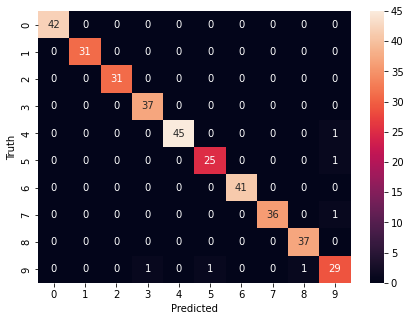

In [20]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(c,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')